In [1]:
#import modules and set up environment 
import os
import sys
path = "../../src/"

sys.path.append(path)
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('tableau-colorblind10')
plt.style.use('seaborn-colorblind')
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
labs = ["SGLD 1%", "SGLD-PS 1%", "SGLD 5%", "SGLD-PS 5%", "SGLD 10%","SGLD-PS 10%"]

### Importing csv files

In [2]:
methods = ["sgld_1", "sgldps_1", "sgld_5", "sgldps_5","sgld_10", "sgldps_10"]
ksd = dict()
for i in range(len(methods)):
    method = methods[i]
    items = glob.glob(f"./out/ksdcover_{method}.csv")[0]
    ksd[method] = pd.read_csv(items).reset_index(drop=True)

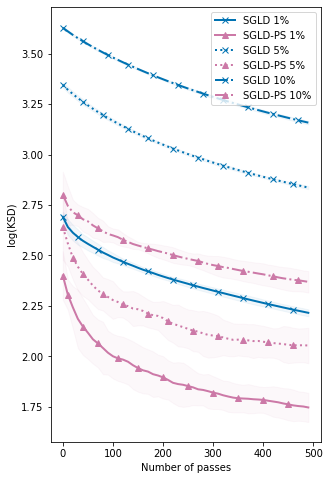

In [3]:
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
lines = ["-","-", "dotted","dotted", "dashdot", "dashdot"]
markers = ["x", "^"]*3
col_idx = [0, 3]*3

fig, ax = plt.subplots(figsize=(5,8))
plt.gcf().subplots_adjust(left=0.15)

for i in range(6):
    plot_data = []
    method = methods[i]
    plot_data.append(np.arange(0, 500, 10))
    smooth_path    = ksd[method].mean(axis=1)
    plot_data.append(smooth_path)
    path_deviation = 2*ksd[method].std(axis=1)
    under_line     = (smooth_path-path_deviation)
    plot_data.append(under_line)
    over_line      = (smooth_path+path_deviation)
    plot_data.append(over_line) 
    dat = np.array(pd.DataFrame(plot_data).T)
    ax.plot(dat[:,0], dat[:, 1], linestyle = lines[i], label=labs[i], c = colors[col_idx[i]], marker=markers[i], markevery=0.05, linewidth=2)
    ax.fill_between(dat[:,0], dat[:, 2], dat[:, 3], color = colors[col_idx[i]],alpha=.05)

# plt.yscale("log")
#plt.xscale("log")  
plt.xlabel("Number of passes")
plt.ylabel("log(KSD)")
#plt.ylim(0.25,3)
plt.legend()
plt.savefig("./fig/lrb_ksd_sgld.pdf")
plt.show()
